# Check template experiment

We want to verify that we have a good differential expression signal - i.e. control and perturb samples separate based on specific and common genes

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pickle
import numpy as np
import pandas as pd
import random
import seaborn as sns
from ponyo import utils

np.random.seed(1)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
i = 1

generic_gene_ids_filename = "generic_gene_ids.pickle"

In [3]:
template_filename = f"/home/alexandra/Documents/Data/Generic_expression_patterns/reviewer_experiment/raw_template_{i}.tsv"

In [4]:
template_specific_gene_ids_filename = f"/home/alexandra/Documents/Data/Generic_expression_patterns/reviewer_experiment/template_specific_gene_ids_{i}.pickle"

In [5]:
template_experiment = pd.read_csv(template_filename, sep="\t", index_col=0, header=0)

In [6]:
# Load saved specific (template-specific) and generic gene ids (same across all template experiments)
with open(template_specific_gene_ids_filename, "rb") as specific_fh:
    specific_gene_ids = pickle.load(specific_fh)

with open(generic_gene_ids_filename, "rb") as generic_fh:
    generic_gene_ids = pickle.load(generic_fh)

In [7]:
# Get NA genes
all_gene_ids = template_experiment.columns
all_gene_ids_tmp = all_gene_ids.difference(specific_gene_ids)
na_gene_ids = all_gene_ids_tmp.difference(generic_gene_ids)

In [8]:
# Template data subsets
template_specific_df = template_experiment[specific_gene_ids]
template_common_df = template_experiment[generic_gene_ids]
template_na_df = template_experiment[na_gene_ids]

In [9]:
print(template_specific_df.shape)
template_specific_df

(8, 10)


,G_622,G_809,G_158,G_156,G_726,G_322,G_910,G_691,G_86,G_321
0_control,226.0,10.0,43.0,22.0,13.0,60.0,45.0,8.0,275.0,9.0
1_control,441.0,5.0,35.0,14.0,18.0,40.0,35.0,10.0,275.0,10.0
2_control,285.0,12.0,20.0,29.0,14.0,40.0,83.0,24.0,375.0,13.0
3_control,346.0,22.0,50.0,18.0,22.0,31.0,53.0,25.0,309.0,13.0
4_perturb,1453.7,1223.7,1241.7,1235.7,1227.7,1253.7,1260.7,1230.7,1544.7,1215.7
5_perturb,1489.7,1220.7,1231.7,1230.7,1233.7,1231.7,1276.7,1229.7,1544.7,1215.7
6_perturb,1451.7,1217.7,1242.7,1246.7,1230.7,1242.7,1252.7,1232.7,1514.7,1213.7
7_perturb,1392.7,1223.7,1242.7,1230.7,1231.7,1238.7,1254.7,1233.7,1513.7,1214.7


In [10]:
print(template_common_df.shape)
template_common_df

(8, 100)


,G_101,G_723,G_668,G_883,G_802,G_302,G_838,G_387,G_335,G_942,...,G_868,G_764,G_885,G_143,G_308,G_32,G_162,G_12,G_531,G_395
0_control,5.0,4.0,83.0,3.0,8.0,0.0,1.0,10.0,199.0,0.0,...,62.0,61.0,0.0,212.0,15.0,26.0,13.0,20.0,15.0,19.0
1_control,2.0,2.0,104.0,2.0,9.0,0.0,1.0,15.0,200.0,0.0,...,30.0,63.0,0.0,322.0,21.0,32.0,13.0,12.0,14.0,10.0
2_control,5.0,6.0,54.0,5.0,14.0,1.0,5.0,13.0,186.0,0.0,...,97.0,96.0,1.0,208.0,30.0,30.0,10.0,11.0,36.0,20.0
3_control,2.0,5.0,94.0,4.0,7.0,0.0,4.0,17.0,255.0,0.0,...,90.0,69.0,1.0,309.0,26.0,23.0,11.0,15.0,14.0,9.0
4_perturb,1213.7,1212.7,1280.7,1215.7,1215.7,1210.7,1213.7,1222.7,1365.7,1210.7,...,1290.7,1337.7,1211.7,1510.7,1227.7,1226.7,1222.7,1223.7,1217.7,1214.7
5_perturb,1221.7,1212.7,1297.7,1214.7,1223.7,1210.7,1216.7,1217.7,1464.7,1210.7,...,1254.7,1263.7,1211.7,1423.7,1214.7,1234.7,1223.7,1221.7,1224.7,1215.7
6_perturb,1214.7,1214.7,1276.7,1213.7,1217.7,1210.7,1215.7,1220.7,1376.7,1212.7,...,1282.7,1319.7,1210.7,1438.7,1220.7,1249.7,1223.7,1222.7,1221.7,1213.7
7_perturb,1212.7,1211.7,1280.7,1222.7,1214.7,1210.7,1211.7,1223.7,1423.7,1211.7,...,1278.7,1287.7,1210.7,1366.7,1235.7,1251.7,1220.7,1231.7,1227.7,1216.7


In [11]:
print(template_na_df.shape)
template_na_df

(8, 890)


,G_0,G_1,G_10,G_100,G_102,G_103,G_104,G_105,G_106,G_107,...,G_990,G_991,G_992,G_993,G_994,G_995,G_996,G_997,G_998,G_999
0_control,403,276,8,25,23,9,65,9,46,7,...,3,8,42,0,18,105,364,40,22,30
1_control,261,252,7,19,27,7,72,9,40,7,...,4,5,19,0,8,146,450,49,19,15
2_control,258,150,4,22,20,5,56,16,64,5,...,1,8,16,0,10,95,286,30,26,26
3_control,256,195,6,27,19,16,69,12,82,5,...,3,8,22,1,17,153,399,44,9,16
4_perturb,137,152,7,26,8,6,88,20,56,9,...,1,10,15,2,16,151,336,33,32,23
5_perturb,189,204,4,14,23,10,61,22,84,6,...,2,8,32,0,19,133,309,29,12,26
6_perturb,259,201,3,26,10,12,75,7,81,10,...,3,7,17,0,19,118,349,38,24,22
7_perturb,291,269,3,25,23,12,64,15,85,4,...,1,10,25,0,14,164,502,36,30,9


Text(0.5, 0.98, 'Template experiment specific genes')

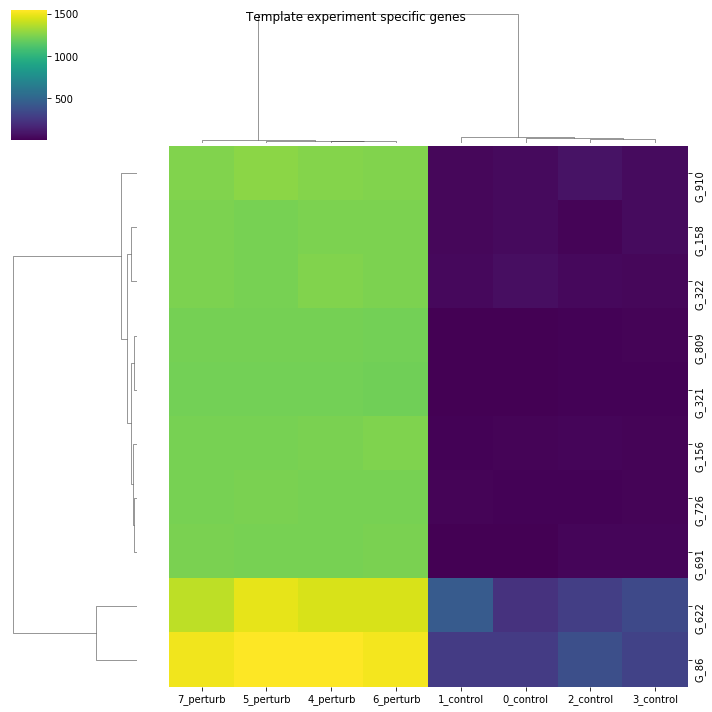

In [12]:
f = sns.clustermap(template_specific_df.T, cmap="viridis")
f.fig.suptitle("Template experiment specific genes")

Text(0.5, 0.98, 'Template experiment common genes')

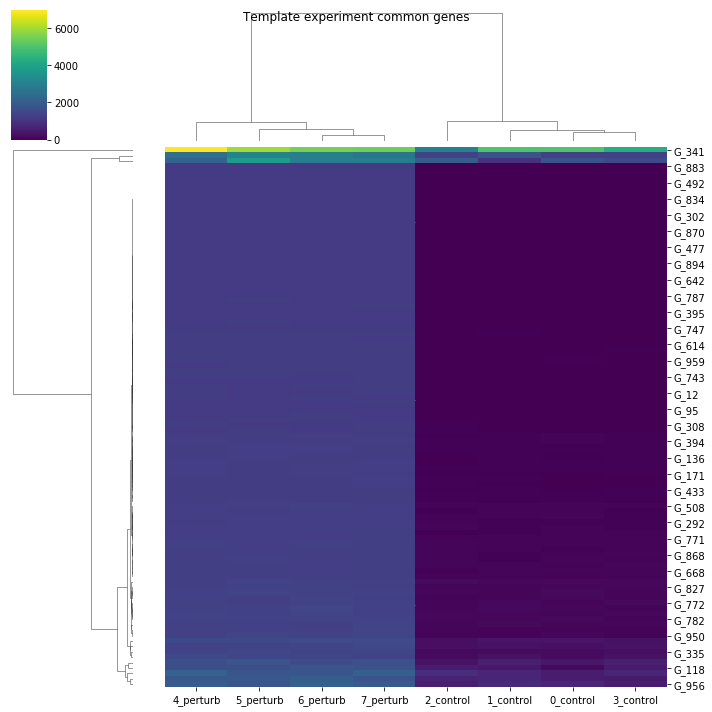

In [13]:
f = sns.clustermap(template_common_df.T, cmap="viridis")
f.fig.suptitle("Template experiment common genes")

Text(0.5, 0.98, 'Template experiment NA genes')

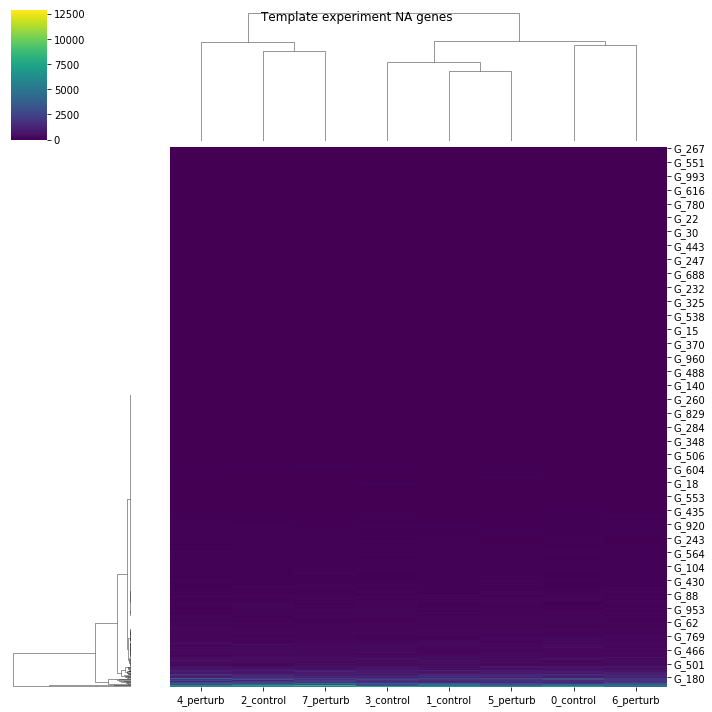

In [14]:
f = sns.clustermap(template_na_df.T, cmap="viridis")
f.fig.suptitle("Template experiment NA genes")